<b><font size=5.8, color='olivedrab'> $\textrm{A Brief Analysis of the Wintertime Polar & Subtropical Jet Streams}$

$\textrm{Libby Orr}$<br>
$\textrm{AOS 573}$<br>
$\textrm{12/14/22}$

<font size=5, color='olivedrab'> $\textrm{Introduction:}$

The goal of this project is to analyze characteristics of both the Polar and Subtropical jet in the winter months of December through February over a 50 year period. This analysis will examine jet characteristics such as change in average latitude, average speed, and other characteristics mentioned later on. I haven't started any actual research yet, but by the end of this project I aim to have a solid base understanding of how both jets have evolved over time and an idea of where I would like my research to lead.

All data used in this project is from the Japanese 55-year Reanalysis dataset (JRA-55) and is in .csv and .gem format. This dataset spans from 1958 to 2017 and contains variables such as average potential vorticity, relative latitude, average speed, and average latitudinal displacement (or rather, a measure of jet 'waviness'). I obtained these files from my advisor Jon, who orginally got them from the [JRA Website](https://rda.ucar.edu/datasets/ds628.0/).

In [1]:
#importing all packages needed for project
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import scipy
from scipy import stats
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns


<font size=5, color='olivedrab'> $\textrm{Loading In & Formatting Data}$

This section is dedicated to the loading in and formatting of the csv files into something easy to work with. Names for each variable's dataset will be assigned and will be used throughout the remainder of the project as well. All steps will be documented in code comments. A brief explanation and the abbreviations of each variable are as follows:<br>

-Average Potential Vorticity (APV): The maximum PV value recorded within the jet, also known as a 'core isertel'. Essentially representative of the region of maximum circulation and a proxy for the core of the jet. <br>

-Equivalent Latitude (EQLAT): The latitude at which the jet is most closely tied to at that time.<br>

-Average Speed (SPD): The average wind speed in the jet (m/s) at that time.<br>

-Average Latitudinal Displacement (ALD): The displacemnt of the jet from its average latitude. Can be used as a measure of waviness.<br>

Let's start by just focusing on Polar Jet data:

In [2]:
#loading in polar jet variables
#nrows=90 to remove nans and other invalid data past Feb 28
#file path may need to be changed depending on how you load in and organize your data
POL_APV=pd.read_csv('POLJ_COREPVjra_daily_columns.csv', nrows=90)
POL_EQLAT=pd.read_csv('POLJ_EQLATjra_daily_columns.csv', nrows=90)
POL_SPD=pd.read_csv('POLJ_SPDjra_daily_columns.csv', nrows=90)
POL_ALD=pd.read_csv('POLJ_SINjra_daily_columns.csv', nrows=90)

The datasets span for longer than 50 years, so they need to be condensed to an even 50 years for easier computations and better organized data for the rest of the project. I've chosen my 50 year period to extend from 1967 to 2017, and the data is cut to this length in the step below.

In [3]:
#formatting to 50 year period
POL_EQLAT=POL_EQLAT.iloc[:,np.r_[0:1,10:61]]
POL_SPD=POL_SPD.iloc[:,np.r_[0:1,10:61]]
POL_ALD=POL_ALD.iloc[:,np.r_[0:1,10:61]]
POL_APV=POL_APV.iloc[:,np.r_[0:1,10:61]]

Finally, the last step of data formatting is to make the rows indexed by the days within the DJF timespan. The data is currently indexed by number of rows and would make for uninformative plots later on. 

In [4]:
#reindexing data
POL_SPD.rename(columns={'Unnamed: 0':'Day'}, inplace=True)
POL_SPD=POL_SPD.set_index('Day')
POL_APV.rename(columns={'Unnamed: 0':'Day'}, inplace=True)
POL_APV=POL_APV.set_index('Day')
POL_ALD.rename(columns={'Unnamed: 0':'Day'}, inplace=True)
POL_ALD=POL_ALD.set_index('Day')
POL_EQLAT.rename(columns={'Unnamed: 0':'Day'}, inplace=True)
POL_EQLAT=POL_EQLAT.set_index('Day')

Below is an example of what our dataset now looks like:

In [5]:
POL_SPD.head()

1967    1968    1969    1970    1971    1972    1973    1974    1975  \
Day                                                                             
1-Dec  40.114  35.979  35.410  35.163  37.227  35.075  35.817  35.219  36.804   
2-Dec  38.923  34.566  37.642  33.357  38.604  33.034  35.720  35.946  35.648   
3-Dec  34.350  33.723  37.730  33.026  40.547  33.103  33.999  37.370  35.971   
4-Dec  32.154  34.511  38.132  35.157  40.407  34.087  33.689  37.884  36.304   
5-Dec  33.605  36.474  37.941  33.188  40.671  33.594  31.930  36.240  35.141   

         1976  ...    2008    2009    2010    2011    2012    2013    2014  \
Day            ...                                                           
1-Dec  39.775  ...  35.573  28.109  36.617  33.418  33.770  30.924  33.932   
2-Dec  39.664  ...  36.736  34.455  35.037  34.783  37.917  32.617  34.377   
3-Dec  41.181  ...  37.645  34.180  36.425  38.393  34.775  31.999  30.656   
4-Dec  44.156  ...  37.653  34.364  36.609  40.811  31.642  31.797  31.193   
5-Dec  41.711  ...  38.616  35.643  33.900  40.534  34.205  34.475  34.838   

         2015    2016    2017  
Day                            
1-Dec  40.433  32.467  34.996  
2-Dec  40.484  32.080  37.156  
3-Dec  39.217  32.099  36.309  
4-Dec  39.032  31.615  36.457  
5-Dec  40.531  33.062  37.636  

[5 rows x 51 columns]

Great! Now, do the exact same formatting prodecure for the Subtropical Jet data as well!

In [6]:
#load in subtropical jet variables
#nrows=90 to remove nans and other invalid data
#file path may need to be changed depending on how you load in and organize your data
STJ_APV=pd.read_csv('STJ_COREPVjra_daily_columns.csv', nrows=90)
STJ_EQLAT=pd.read_csv('STJ_EQLATjra_daily_columns.csv', nrows=90)
STJ_SPD=pd.read_csv('STJ_SPDjra_daily_columns.csv', nrows=90)
STJ_ALD=pd.read_csv('STJ_SINjra_daily_columns.csv', nrows=90)

In [7]:
#formatting to 50 year period
STJ_EQLAT=STJ_EQLAT.iloc[:,np.r_[0:1,10:61]]
STJ_SPD=STJ_SPD.iloc[:,np.r_[0:1,10:61]]
STJ_ALD=STJ_ALD.iloc[:,np.r_[0:1,10:61]]
STJ_APV=STJ_APV.iloc[:,np.r_[0:1,10:61]]

In [8]:
#Index rows by Day value
STJ_SPD.rename(columns={'Unnamed: 0':'Day'}, inplace=True)
STJ_SPD=STJ_SPD.set_index('Day')
STJ_APV.rename(columns={'Unnamed: 0':'Day'}, inplace=True)
STJ_APV=STJ_APV.set_index('Day')
STJ_ALD.rename(columns={'Unnamed: 0':'Day'}, inplace=True)
STJ_ALD=STJ_ALD.set_index('Day')
STJ_EQLAT.rename(columns={'Unnamed: 0':'Day'}, inplace=True)
STJ_EQLAT=STJ_EQLAT.set_index('Day')

Let's check to make sure this data turned out correctly as well. 

In [9]:
STJ_SPD.head()
#it does!

1967    1968    1969    1970    1971    1972    1973    1974    1975  \
Day                                                                             
1-Dec  41.438  38.654  50.527  42.138  41.355  45.114  43.151  47.728  38.494   
2-Dec  41.774  40.285  48.671  42.551  40.045  45.864  40.708  48.790  37.977   
3-Dec  41.323  38.889  51.413  42.279  39.692  44.516  39.276  48.922  40.378   
4-Dec  42.957  42.129  52.820  39.106  40.482  46.388  41.732  47.466  41.136   
5-Dec  42.115  40.688  50.523  38.927  40.899  47.766  44.406  47.319  41.587   

         1976  ...    2008    2009    2010    2011    2012    2013    2014  \
Day            ...                                                           
1-Dec  44.784  ...  43.474  35.914  38.622  43.728  45.598  42.074  41.042   
2-Dec  42.281  ...  45.793  46.742  38.755  43.252  46.873  42.675  44.036   
3-Dec  41.201  ...  42.972  48.502  39.439  42.306  45.668  43.078  43.393   
4-Dec  43.641  ...  39.545  47.756  38.481  41.654  45.183  44.507  43.460   
5-Dec  42.655  ...  43.124  47.928  39.438  42.636  46.190  46.398  42.851   

         2015    2016    2017  
Day                            
1-Dec  48.019  43.868  44.665  
2-Dec  46.734  43.007  46.563  
3-Dec  45.013  46.455  47.290  
4-Dec  46.845  44.917  47.832  
5-Dec  45.207  44.068  48.608  

[5 rows x 51 columns]

For each variable, the data is formatted the same. The first column represents the day and month of the value while each of the following columns represent the year. Every day in the months of December through February has its own row. For example, if I took the mean of the first row in the PV data, I would have the average PV on December 1st over a span of the past 50 years!

<font size=5, color='olivedrab'> $\textrm{An Analysis of Each Jet From A Statistical Standpoint}$

Now that the statistical data is decently formatted for each of the jets, it can now be analyzed. First, let's examine the Polar Jet on both a yearly and daily scale. By taking a mean of the data along its 0 axis, we get an average of each column or, in this case, a yearly average. By taking the mean along the 1 axis, we obtain the daily averages. 

In [10]:
#avg speeds
#axis 0 represents mean along each column
#axis 1 represents mean along each row
year_avg_spd_p=POL_SPD.mean(axis=0)
day_avg_spd_p=POL_SPD.mean(axis=1)

#avg PV values
year_avg_PV_p=POL_APV.mean(axis=0)
day_avg_PV_p=POL_APV.mean(axis=1)

#avg latitude
year_avg_lat_p=POL_EQLAT.mean(axis=0)
day_avg_lat_p=POL_EQLAT.mean(axis=1)

#avg latitude displacement
year_avg_latdis_p=POL_ALD.mean(axis=0)
day_avg_latdis_p=POL_ALD.mean(axis=1)

#Checking the values. They appear reasonable!
#day_avg_lat_p
#year_avg_spd_p

Now that we have our data in numbers, it'll be a lot easier to see it visually. Let's make some plots!

<b>Polar Jet yearly averages:</b>

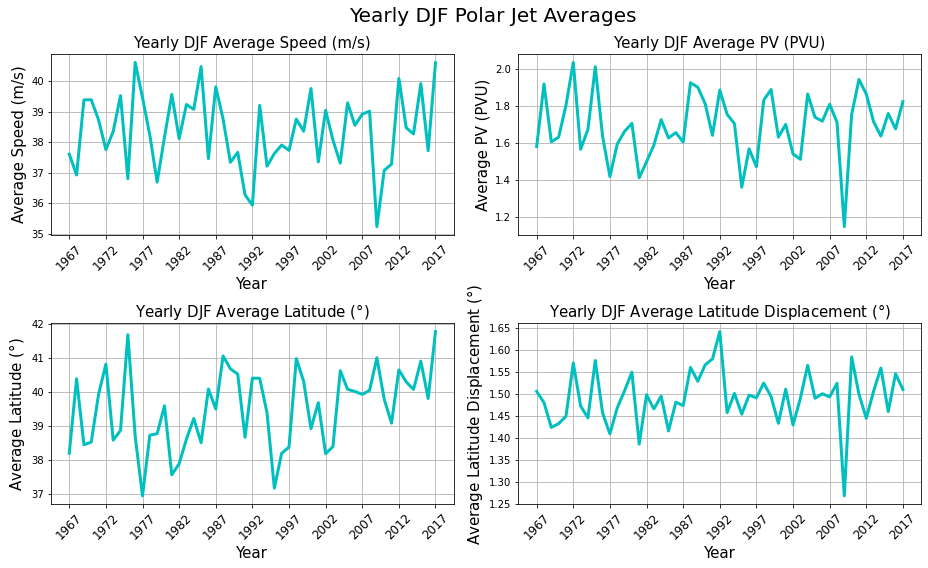

In [11]:
fig, axs = plt.subplots(2, 2,figsize=(13,8))
fig.suptitle('Yearly DJF Polar Jet Averages', fontsize=20, x=0.53)
axs[0,0].plot(year_avg_spd_p, linewidth=3, color='c')
axs[0,0].set_title('Yearly DJF Average Speed (m/s)', fontsize=15)
axs[0,0].tick_params(axis='x',rotation=45, labelsize=12)
axs[0,0].set_xticks(axs[0,0].get_xticks()[::5])
axs[0,0].set_xlabel('Year', fontsize=15)
axs[0,0].set_ylabel('Average Speed (m/s)', fontsize=15)
axs[0,0].grid()
axs[0,1].plot(year_avg_PV_p, linewidth=3, color='c')
axs[0,1].set_title('Yearly DJF Average PV (PVU)', fontsize=15)
axs[0,1].tick_params(axis='x',rotation=45, labelsize=12)
axs[0,1].set_xticks(axs[0,1].get_xticks()[::5])
axs[0,1].set_xlabel('Year', fontsize=15)
axs[0,1].set_ylabel('Average PV (PVU)', fontsize=15)
axs[0,1].grid()
axs[1,0].plot(year_avg_lat_p, linewidth=3, color='c')
axs[1,0].set_title('Yearly DJF Average Latitude ($\degree$)', fontsize=15)
axs[1,0].tick_params(axis='x',rotation=45, labelsize=12)
axs[1,0].set_xticks(axs[1,0].get_xticks()[::5])
axs[1,0].set_xlabel('Year', fontsize=15)
axs[1,0].set_ylabel('Average Latitude ($\degree$)', fontsize=15)
axs[1,0].grid()
axs[1,1].plot(year_avg_latdis_p, linewidth=3, color='c')
axs[1,1].set_title('Yearly DJF Average Latitude Displacement ($\degree$)', fontsize=15)
axs[1,1].tick_params(axis='x',rotation=45, labelsize=12)
axs[1,1].set_xticks(axs[1,1].get_xticks()[::5])
axs[1,1].set_xlabel('Year', fontsize=15)
axs[1,1].set_ylabel('Average Latitude Displacement ($\degree$)', fontsize=15)
axs[1,1].grid()
plt.tight_layout()


Great! There's a lot a variation in each of the variables, which is to be expected since such a large time frame is covered. It's a bit difficult to see trends at the moment, but those will be discussed later on. 

<b>Polar Daily Averages:</b>

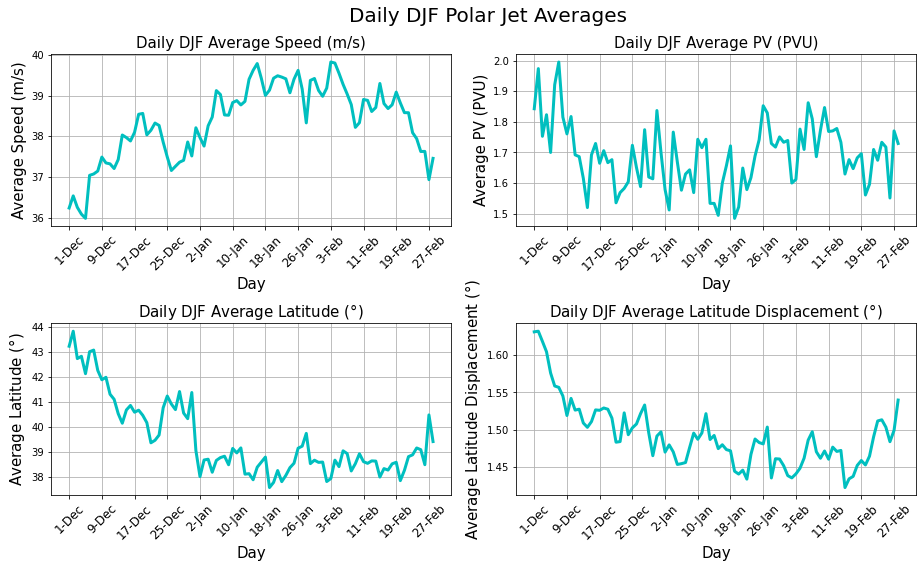

In [48]:
fig, axs = plt.subplots(2, 2,figsize=(13,8))
fig.suptitle('Daily DJF Polar Jet Averages', fontsize=20, x=0.53)
axs[0,0].plot(day_avg_spd_p, linewidth=3, color='c')
axs[0,0].set_title('Daily DJF Average Speed (m/s)', fontsize=15)
axs[0,0].tick_params(axis='x',rotation=45, labelsize=12)
axs[0,0].set_xticks(axs[0,0].get_xticks()[::8])
axs[0,0].set_xlabel('Day', fontsize=15)
axs[0,0].set_ylabel('Average Speed (m/s)', fontsize=15)
axs[0,0].grid()
axs[0,1].plot(day_avg_PV_p, linewidth=3, color='c')
axs[0,1].set_title('Daily DJF Average PV (PVU)', fontsize=15)
axs[0,1].tick_params(axis='x',rotation=45, labelsize=12)
axs[0,1].set_xticks(axs[0,1].get_xticks()[::8])
axs[0,1].set_xlabel('Day', fontsize=15)
axs[0,1].set_ylabel('Average PV (PVU)', fontsize=15)
axs[0,1].grid()
axs[1,0].plot(day_avg_lat_p, linewidth=3, color='c')
axs[1,0].set_title('Daily DJF Average Latitude ($\degree$)', fontsize=15)
axs[1,0].tick_params(axis='x',rotation=45, labelsize=12)
axs[1,0].set_xticks(axs[1,0].get_xticks()[::8])
axs[1,0].set_xlabel('Day', fontsize=15)
axs[1,0].set_ylabel('Average Latitude ($\degree$)', fontsize=15)
axs[1,0].grid()
axs[1,1].plot(day_avg_latdis_p, linewidth=3, color='c')
axs[1,1].set_title('Daily DJF Average Latitude Displacement ($\degree$)', fontsize=15)
axs[1,1].tick_params(axis='x',rotation=45, labelsize=12)
axs[1,1].set_xticks(axs[1,1].get_xticks()[::8])
axs[1,1].set_xlabel('Day', fontsize=15)
axs[1,1].set_ylabel('Average Latitude Displacement ($\degree$)', fontsize=15)
axs[1,1].grid()
plt.tight_layout()

As the days go further into the winter season, there are several noticeable trends. The average speed increases and reaches a peak in late January before it begins to slow again in February. PV tends to decrease significantly in mid-December only to slowly increase again in late February. Both average latitude and average latitude displacement decrease near the beginning of December and remain low until mid to late February.

Now let's do the same analysis for the Subtropical Jet. Afterwards, we can compare the evolution of the two jets over the past 50 years!

In [49]:
#same axis 0 and axis 1 standards as before
#avg speeds
year_avg_spd_s=STJ_SPD.mean(axis=0)
day_avg_spd_s=STJ_SPD.mean(axis=1)

#avg PV values
year_avg_PV_s=STJ_APV.mean(axis=0)
day_avg_PV_s=STJ_APV.mean(axis=1)

#avg latitude
year_avg_lat_s=STJ_EQLAT.mean(axis=0)
day_avg_lat_s=STJ_EQLAT.mean(axis=1)

#avg latitude displacement
year_avg_latdis_s=STJ_ALD.mean(axis=0)
day_avg_latdis_s=STJ_ALD.mean(axis=1)

#Checking the values. They appear reasonable!
#day_avg_spd_s
#year_avg_spd_s.values()

<b>Subtropical Yearly Averages:</b>

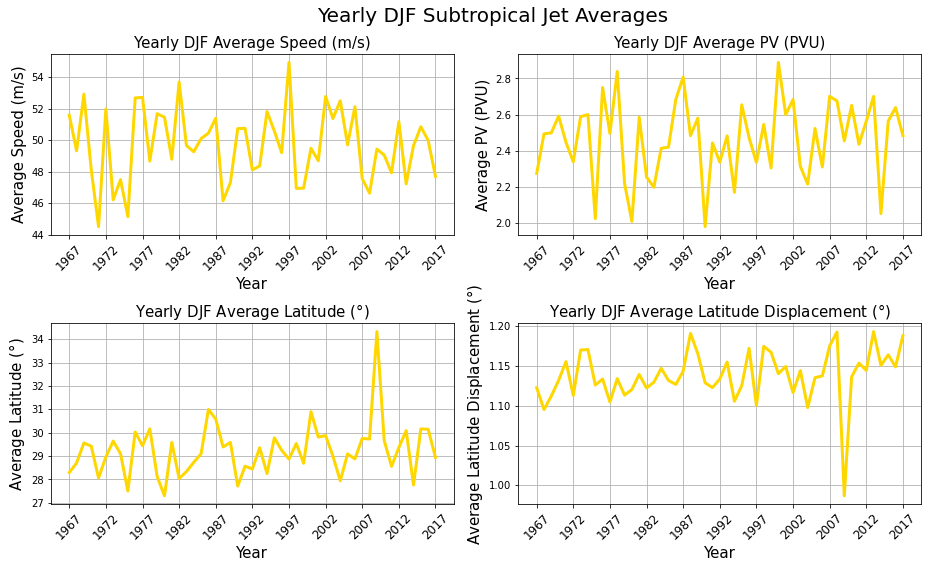

In [50]:
fig, axs = plt.subplots(2, 2,figsize=(13,8))
fig.suptitle('Yearly DJF Subtropical Jet Averages', fontsize=20, x=0.53)
axs[0,0].plot(year_avg_spd_s, linewidth=3, color='gold')
axs[0,0].set_title('Yearly DJF Average Speed (m/s)', fontsize=15)
axs[0,0].tick_params(axis='x',rotation=45, labelsize=12)
axs[0,0].set_xticks(axs[0,0].get_xticks()[::5])
axs[0,0].set_xlabel('Year', fontsize=15)
axs[0,0].set_ylabel('Average Speed (m/s)', fontsize=15)
axs[0,0].grid()
axs[0,1].plot(year_avg_PV_s, linewidth=3, color='gold')
axs[0,1].set_title('Yearly DJF Average PV (PVU)', fontsize=15)
axs[0,1].tick_params(axis='x',rotation=45, labelsize=12)
axs[0,1].set_xticks(axs[0,1].get_xticks()[::5])
axs[0,1].set_xlabel('Year', fontsize=15)
axs[0,1].set_ylabel('Average PV (PVU)', fontsize=15)
axs[0,1].grid()
axs[1,0].plot(year_avg_lat_s, linewidth=3, color='gold')
axs[1,0].set_title('Yearly DJF Average Latitude ($\degree$)', fontsize=15)
axs[1,0].tick_params(axis='x',rotation=45, labelsize=12)
axs[1,0].set_xticks(axs[1,0].get_xticks()[::5])
axs[1,0].set_xlabel('Year', fontsize=15)
axs[1,0].set_ylabel('Average Latitude ($\degree$)', fontsize=15)
axs[1,0].grid()
axs[1,1].plot(year_avg_latdis_s, linewidth=3, color='gold')
axs[1,1].set_title('Yearly DJF Average Latitude Displacement ($\degree$)', fontsize=15)
axs[1,1].tick_params(axis='x',rotation=45, labelsize=12)
axs[1,1].set_xticks(axs[1,1].get_xticks()[::5])
axs[1,1].set_xlabel('Year', fontsize=15)
axs[1,1].set_ylabel('Average Latitude Displacement ($\degree$)', fontsize=15)
axs[1,1].grid()
plt.tight_layout()

These yearly plots also have a wide range of variation and will also be discussed after the daily averages plots. 

<b>Subtropical Daily Averages:</b>

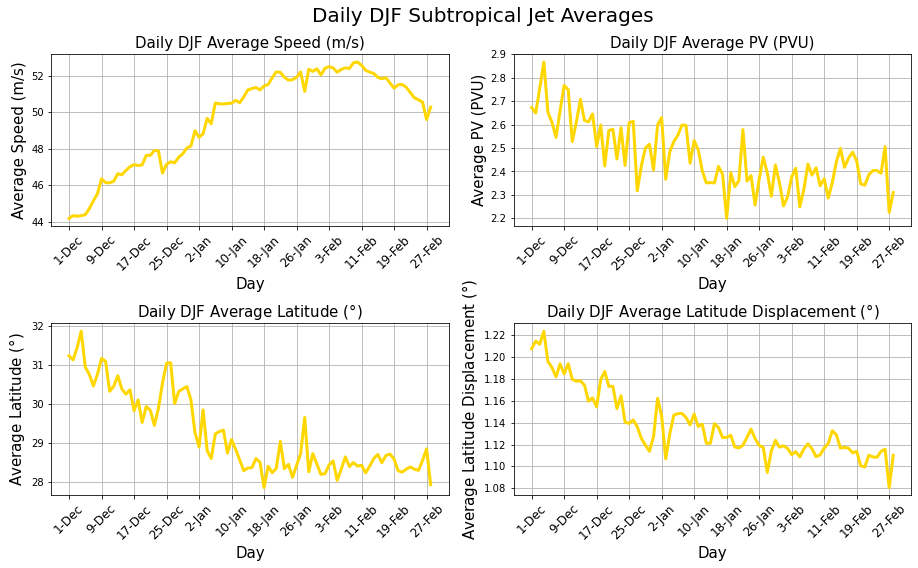

In [51]:
fig, axs = plt.subplots(2, 2,figsize=(13,8))
fig.suptitle('Daily DJF Subtropical Jet Averages', fontsize=20, x=0.53)
axs[0,0].plot(day_avg_spd_s, linewidth=3, color='gold')
axs[0,0].set_title('Daily DJF Average Speed (m/s)', fontsize=15)
axs[0,0].tick_params(axis='x',rotation=45, labelsize=12)
axs[0,0].set_xticks(axs[0,0].get_xticks()[::8])
axs[0,0].set_xlabel('Day', fontsize=15)
axs[0,0].set_ylabel('Average Speed (m/s)', fontsize=15)
axs[0,0].grid()
axs[0,1].plot(day_avg_PV_s, linewidth=3, color='gold')
axs[0,1].set_title('Daily DJF Average PV (PVU)', fontsize=15)
axs[0,1].tick_params(axis='x',rotation=45, labelsize=12)
axs[0,1].set_xticks(axs[0,1].get_xticks()[::8])
axs[0,1].set_xlabel('Day', fontsize=15)
axs[0,1].set_ylabel('Average PV (PVU)', fontsize=15)
axs[0,1].grid()
axs[1,0].plot(day_avg_lat_s, linewidth=3, color='gold')
axs[1,0].set_title('Daily DJF Average Latitude ($\degree$)', fontsize=15)
axs[1,0].tick_params(axis='x',rotation=45, labelsize=12)
axs[1,0].set_xticks(axs[1,0].get_xticks()[::8])
axs[1,0].set_xlabel('Day', fontsize=15)
axs[1,0].set_ylabel('Average Latitude ($\degree$)', fontsize=15)
axs[1,0].grid()
axs[1,1].plot(day_avg_latdis_s, linewidth=3, color='gold')
axs[1,1].set_title('Daily DJF Average Latitude Displacement ($\degree$)', fontsize=15)
axs[1,1].tick_params(axis='x',rotation=45, labelsize=12)
axs[1,1].set_xticks(axs[1,1].get_xticks()[::8])
axs[1,1].set_xlabel('Day', fontsize=15)
axs[1,1].set_ylabel('Average Latitude Displacement ($\degree$)', fontsize=15)
axs[1,1].grid()
plt.tight_layout()

The Subtropical Jet sees similar daily trends to the Polar Jet. Average speed reaches a maximum in late January and avgerape PV declines until around mid-February. Both latitude variables also saw a steady decline throughout the winter, though these values don't seem to be picking back up like they did for the Polar Jet. 

Now for some comparison plots!

<font size=4, color='olivedrab'> $\textrm{Comparison of Yearly Averages}$

The next set of plots will be a comparison of both the Polar and Subtropical Jets' yearly averages of each variable to see how they've evolved over time relative to each other. The plots will also feature a line of best fit surrounded by a 95% confidence interval for easier visualization of the 50-year trends. Since these plots will all be fairly similar in creation, I've created a function to make things go by faster. 

In [52]:
#function for best fit plots
def best_fit(polar,subtropical):
    a=np.arange(len(polar))
    b=np.arange(len(subtropical))
    fig,ax=plt.subplots(1,1, figsize=(10,7))
    ax.plot(polar, linewidth=2,color='c',label='Polar Jet')
    ax.plot(subtropical, linewidth=2,color='gold',label='Subtropical Jet')
    sns.regplot(a,polar,fit_reg=True, color='k', scatter_kws={'s':0})
    sns.regplot(b,subtropical,fit_reg=True, color='k', scatter_kws={'s':0})
    ax.tick_params(axis='x',rotation=45, size=10)
    ax.set_xticks(ax.get_xticks()[::5])
    ax.set_xlabel('Years', size=13)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.25, 0.5),loc='center right')
    
    return best_fit 


And now that we have our function, lets start making plots! The plots will throw up a small error when created, but it's no problem at all. It's simply a result of the way the data is structured and being handled!

<b>Yearly Speed:</b>

/opt/anaconda3/envs/aos573/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Wind Speed (m/s)')

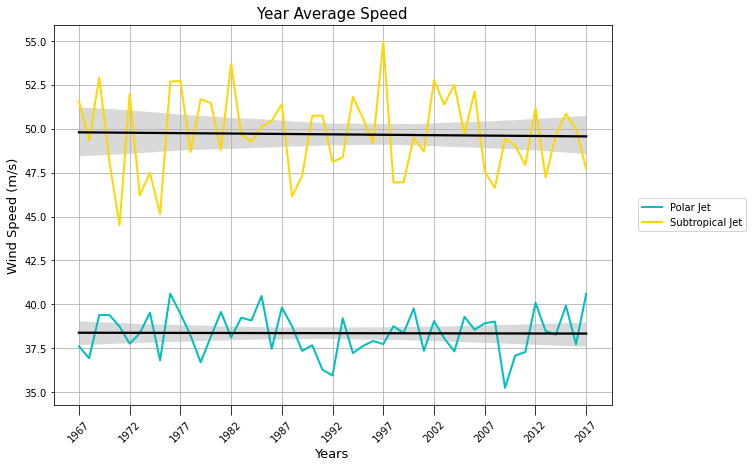

In [53]:
#speeds
best_fit(year_avg_spd_p,year_avg_spd_s)
plt.title('Year Average Speed',fontsize=15)
plt.ylabel('Wind Speed (m/s)', fontsize=13)

It's a bit hard to tell if the lines are changing at all, so we should calculate their slope so that we have a numerical value and know for sure what the trend is. 

In [54]:
#these are established here, but also used later for other slope calculations
x=np.arange(len(year_avg_spd_p))
y=np.arange(len(year_avg_spd_s))

#slope calculation
polar_spd=scipy.stats.linregress(x,year_avg_spd_p)
tropic_spd=scipy.stats.linregress(y,year_avg_spd_s)
pol_slopes = str(round(polar_spd.slope, 5))
trop_slopes = str(round(tropic_spd.slope, 5))
print('The polar jet line has a slope of', pol_slopes, 'while the subtropical jet has a slope of', trop_slopes)

The polar jet line has a slope of -0.00096 while the subtropical jet has a slope of -0.00463


So the speed of both jets is decreasing with time, but only very slightly! However slight it may be, this is an interesting trend to pay attention to. 

<b>Yearly PV:</b>

/opt/anaconda3/envs/aos573/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Potential Vorticity (PVU)')

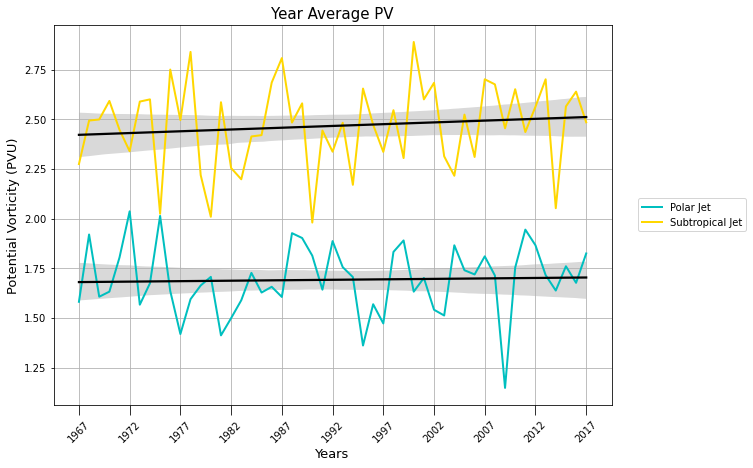

In [55]:
#PV
best_fit(year_avg_PV_p,year_avg_PV_s)
plt.title('Year Average PV',fontsize=15)
plt.ylabel('Potential Vorticity (PVU)', fontsize=13)

In [56]:
#slope
polar_PV=scipy.stats.linregress(x,year_avg_PV_p)
tropic_PV=scipy.stats.linregress(y,year_avg_PV_s)
pol_slopepv = str(round(polar_PV.slope, 5))
trop_slopepv = str(round(tropic_PV.slope, 5))
print('The polar jet line has a slope of', pol_slopepv, 'while the subtropical jet has a slope of', trop_slopepv)

The polar jet line has a slope of 0.00046 while the subtropical jet has a slope of 0.00179


It turns out that the PV associated with the jets is increasing ever so slightly over time. In this data, the PV values represent the core isertel of the jet at each specific timestep, or rather, the center of moximum rotation within a jet core.

<b>Yearly Latitude:</b>

/opt/anaconda3/envs/aos573/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Latitude ($^{\\circ}$N)')

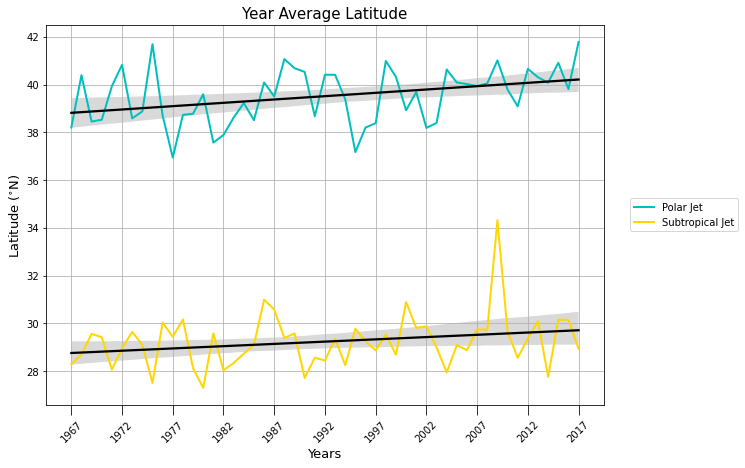

In [57]:
best_fit(year_avg_lat_p,year_avg_lat_s)
plt.title('Year Average Latitude',fontsize=15)
plt.ylabel('Latitude ($^{\circ}$N)', fontsize=13)

In [58]:
polar_lat=scipy.stats.linregress(x,year_avg_lat_p)
tropic_lat=scipy.stats.linregress(y,year_avg_lat_s)
pol_slopel = str(round(polar_lat.slope, 5))
trop_slopel = str(round(tropic_lat.slope, 5))
print('The polar jet line has a slope of', pol_slopel, 'while the subtropical jet has a slope of', trop_slopel)

The polar jet line has a slope of 0.02789 while the subtropical jet has a slope of 0.01903


Latitude is the first variable that actually has a significant slope, which implies that each jet is slowly creeping closer and closer to the pole each year. This is definitely an important feature, especially since the location of a jet can have such a large impact on our day-to-day weather. The polar jet is also moving poleward quite a bit faster than the subtropical jet! This poleward trend will most likely be one of the main focuses of my future research.

<b>Yearly Latitude Displacement:</b>

/opt/anaconda3/envs/aos573/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Latitude Displacement ($^{\\circ}$)')

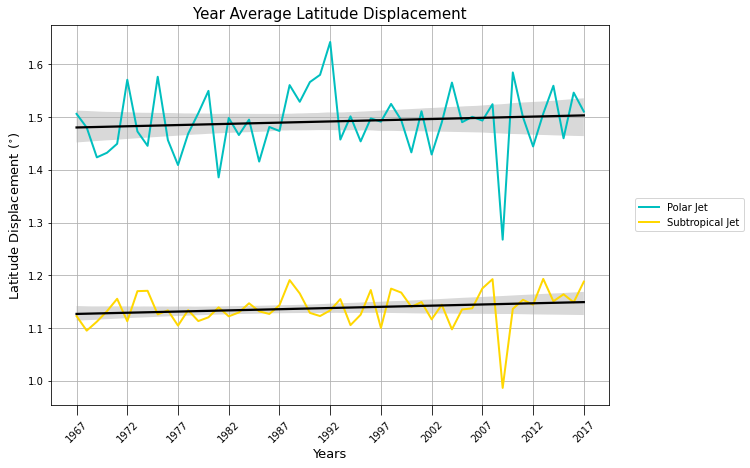

In [59]:
best_fit(year_avg_latdis_p,year_avg_latdis_s)
plt.title('Year Average Latitude Displacement',fontsize=15)
plt.ylabel('Latitude Displacement ($^{\circ}$)', fontsize=13)

In [60]:
polar_ld=scipy.stats.linregress(x,year_avg_latdis_p)
tropic_ld=scipy.stats.linregress(y,year_avg_latdis_s)
pol_slopeld = str(round(polar_ld.slope, 5))
trop_slopeld = str(round(tropic_ld.slope, 5))
print('The polar jet line has a slope of', pol_slopeld, 'while the subtropical jet has a slope of', trop_slopeld)

The polar jet line has a slope of 0.00046 while the subtropical jet has a slope of 0.00045


The slopes for both of the jets are very similar for latitude displacement, which is interesting given that the polar jet seems to be moving poleward so much faster than the subtropical jet. This is something to note, and I will definitely keep it in mind as I move forward with my research. 

<font size=5, color='olivedrab'> $\textrm{Visualizing the Data}$

The other form of data used in this analysis was originally given to me in the form of GEMPAK files, which are notoriously incompatible with Python. There is, however, a [GEMPAK to NetCDF3 Decoder](https://github.com/mjames-upc/edu.ucar.unidata.edex.plugin.gempak) in the form of a Jar file that uses Java commands within a computer's terminal. Through numerous Unix commands, I was able to obtain the data and convert it to .nc files to be compatible with xarray. Shoutout to Pete, Ian, and Patrick for helping me figure this out. Below is the basic line of code used:

java  -jar  gempakToCF.jar  INPUT.gem  OUTPUT.nc

Since the datasets were so large, this section focuses on analyzing only the Polar Jet. In order for the file to be under 1 GB, I had to cut out some unneeded data and variables and create a new data file. I've included this procedure below in raw format since it didn't need to be ran again. 

Finally, read in the new data:

In [61]:
#Read in the new .nc file
polarjet=xr.open_dataset('polarjet.nc')#data path may need to be updated if files saved differently
polarjet

<xarray.Dataset>
Dimensions:    (time: 4542, lat: 73, lon: 289)
Coordinates:
  * time       (time) datetime64[ns] 1967-01-12 1967-01-13 ... 2017-02-28
    PRES       float64 ...
  * lat        (lat) float64 0.0 1.25 2.5 3.75 5.0 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 356.2 357.5 358.8 360.0
Data variables:
    AVGV_PRES  (time, lat, lon) float32 ...
    AVGU_PRES  (time, lat, lon) float32 ...
Attributes:
    Conventions:              CF-1.4
    title:                    GRID data
    history:                  Direct read of GEMPAK into NetCDF-Java 4 API
    featureType:              GRID
    location:                 thta315330_jra.gem
    _CoordinateModelRunDate:  1958-01-01T00:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...
    geospatial_lat_min:       0.0
    geospatial_lat_max:       90.0
    geospatial_lon_min:       0.0
    geospatial_lon_max:       360.0

Great! Now the data set looks nice, is in xarray form, and can be plotted. The data has one overwhelming outlier that needs to be removed, which is done in the next step. 

In [62]:
polarjet=polarjet.where(polarjet.AVGV_PRES<300)
polarjet=polarjet.where(polarjet.AVGU_PRES<300)

Now take the yearly mean of the u and v winds:

In [63]:
#polar
pol_u=polarjet.AVGU_PRES.groupby('time.year').mean('time')
pol_v=polarjet.AVGV_PRES.groupby('time.year').mean('time')

Calculate the magnitude of the wind vectors so they can be plotted. 

In [64]:
mag=np.sqrt(pol_u**2+pol_v**2)

And finally plot a 50 year mean!

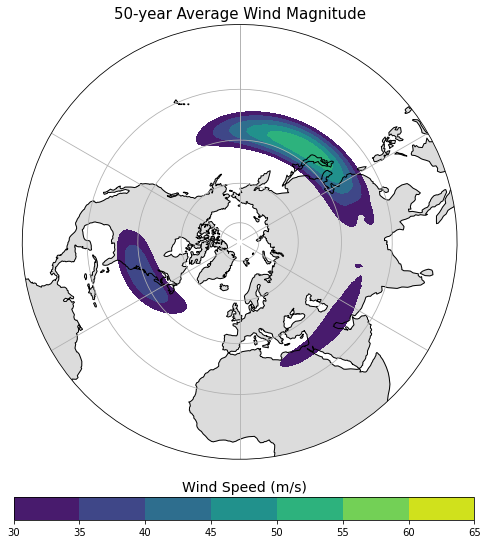

In [65]:
lon,lat=np.meshgrid(polarjet.lon, polarjet.lat)
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection=ccrs.NorthPolarStereo())
ax.coastlines(color='k')
cs=ax.contourf(lon,lat, mag.mean('year'),transform=ccrs.PlateCarree(),cmap=plt.cm.viridis, levels=np.arange(30,70,5))
#set the speed to a threshold of 30 m/s as a lower base value
cax=fig.add_axes([0.12,0.02,0.8,0.04])#left,bottom,width,height
cbar=plt.colorbar(cs,cax=cax,orientation='horizontal')
cbar.ax.set_title('Wind Speed (m/s)', fontsize=14)
ax.set_title('50-year Average Wind Magnitude', fontsize=15)
ax.add_feature(cfeature.LAND,color='gainsboro')

#make plot circular
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.gridlines()

Circular plot method taken from [Cartopy Website](https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html).

Great! This tells a lot about the Polar Jet's typical speeds and location. It seems that the Polar Jet is typically strongest and most prominent off the coast of eastern Asia, over Japan, and into the western Pacific Ocean. There is also a weaker but still prominent portion of the jet off the East Coast of the United States. Finally, there is another much weaker strip of the jet stretching from northern Africa into Asia. While I'm calling these portions 'weak', they're actually the parts of the Polar Jet that have been the fastest over the past 50 years.

And now a plot of the wind barbs along with the jet core filled contours:

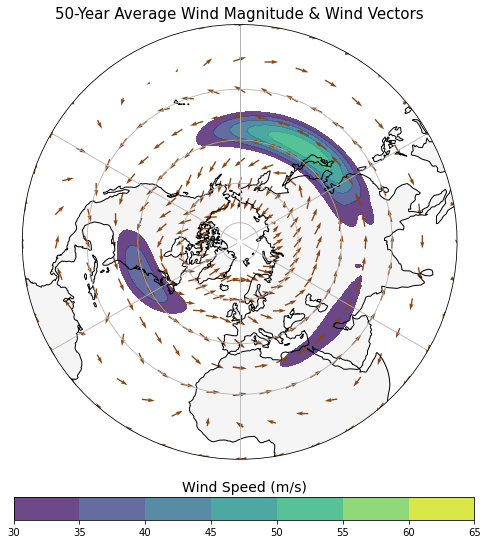

In [66]:
#calculate values for plotting barbs
u=(pol_u/mag)
v=(pol_v/mag)
new_u=u.where(u.lat<75).mean('year')#removed upper latitude values to avoid clutter
new_v=v.where(v.lat<75).mean('year')
lon,lat=np.meshgrid(polarjet.lon, polarjet.lat)

space=8

#plot
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection=ccrs.NorthPolarStereo())
ax.coastlines(color='k')
cs=ax.contourf(polarjet.lon, polarjet.lat, mag.mean('year'),transform=ccrs.PlateCarree(),cmap=plt.cm.viridis,alpha=0.8 ,levels=np.arange(30,70,5))
plt.quiver(lon[::space,::space],lat[::space,::space],new_u.values[::space,::space],new_v.values[::space,::space],transform=ccrs.PlateCarree(),pivot='middle', color='saddlebrown')
cax=fig.add_axes([0.12,0.02,0.8,0.04])#left,bottom,width,height
cbar=plt.colorbar(cs,cax=cax,orientation='horizontal')
cbar.ax.set_title('Wind Speed (m/s)', fontsize=14)
ax.set_title('50-Year Average Wind Magnitude & Wind Vectors', fontsize=15)
ax.add_feature(cfeature.LAND,color='whitesmoke')


#make plot circular
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.gridlines()

Now we can have somewhat of an idea of what the hemispheric circulation pattern is like. What I find most interesting is that, near the large jet core over Japan and the Pacific, you can see the wind vectors converge towards the entrance of the jet core and diverge near the exit. This matches up with what wind patterns usually look like around a jet and help me know my plot is correct. This feature can also be seen in the jet core off the coast of the U.S. to a lesser extent. Cool!

<font size=4, color='olivedrab'> $\textrm{Monthly Plots}$

The next and final step of this project is to view the Polar Jet's average magnitude by month to see how it tends to evolve over the course of the winter months. We start by regrouping the data by month:

In [67]:
#monthly grouping
mon_u=polarjet.AVGU_PRES.groupby('time.month').mean('time')
mon_v=polarjet.AVGV_PRES.groupby('time.month').mean('time')

Then getting u and v vectors for each month:

In [68]:
#u
jan_u=mon_u.isel(month=0)
feb_u=mon_u.isel(month=1)
dec_u=mon_u.isel(month=2)
#v
jan_v=mon_v.isel(month=0)
feb_v=mon_v.isel(month=1)
dec_v=mon_v.isel(month=2)

And finally calculating the magnitude for each month:

In [69]:
#monthly magnitudes
jan_mag=np.sqrt(jan_u**2+jan_v**2)
feb_mag=np.sqrt(feb_u**2+feb_v**2)
dec_mag=np.sqrt(dec_u**2+dec_v**2)

Now the values can be plotted! To keep continuity amongst plots, both the magnitude contours and the wind barbs will be plotted fo reach month.

<b>Important Note!</b>: The cells below that create plots should only be ran once. If ran more than once, the wind vectors freak out and go all crazy for some reason. If this does happen, it can be easily fixed by restarting the kernel. 

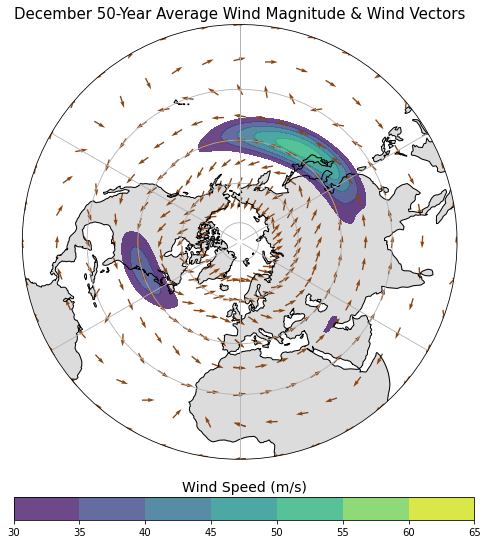

In [70]:
#dec
#calculate wind vectors
d_u=(dec_u/dec_mag)
d_v=(dec_v/dec_mag)
dec_u=d_u.where(d_u.lat<75).where(d_u.values<100).where(d_u.values>-100)#eliminate some wild outlier values
dec_v=d_v.where(d_v.lat<75).where(d_v.values<100).where(d_v.values>-100)
lon,lat=np.meshgrid(dec_mag.lon,dec_mag.lat)

space=8

#plot
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection=ccrs.NorthPolarStereo())
ax.coastlines(color='k')
cs=ax.contourf(dec_mag.lon,dec_mag.lat, dec_mag,transform=ccrs.PlateCarree(),cmap=plt.cm.viridis, alpha=0.8,levels=np.arange(30,70,5))
plt.quiver(lon[::space,::space],lat[::space,::space],dec_u.values[::space,::space],dec_v.values[::space,::space],transform=ccrs.PlateCarree(),pivot='middle', color='saddlebrown')
cax=fig.add_axes([0.12,0.02,0.8,0.04])
cbar=plt.colorbar(cs,cax=cax,orientation='horizontal')
cbar.ax.set_title('Wind Speed (m/s)', fontsize=14)
ax.add_feature(cfeature.LAND,color='gainsboro')
ax.set_title('December 50-Year Average Wind Magnitude & Wind Vectors', fontsize=15, loc='center')

#make plot circular
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.gridlines()
    

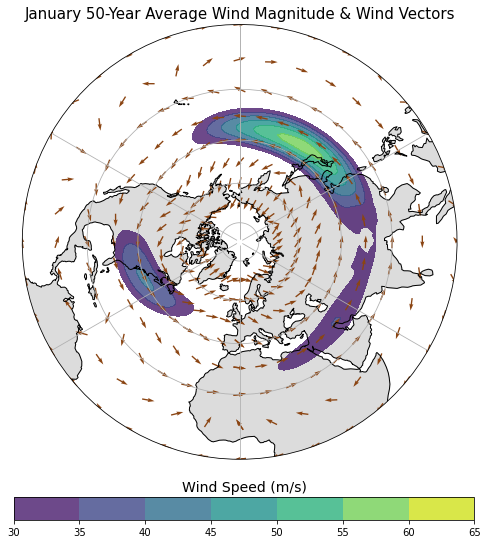

In [71]:
#jan 

#calculate wind vectors
d_u=(jan_u/jan_mag)
d_v=(jan_v/jan_mag)
jan_u=d_u.where(d_u.lat<75).where(d_u.values<100).where(d_u.values>-100)#eliminate some wild outlier values
jan_v=d_v.where(d_v.lat<75).where(d_v.values<100).where(d_v.values>-100)
lon,lat=np.meshgrid(jan_mag.lon,jan_mag.lat)

space=8

#plot
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection=ccrs.NorthPolarStereo())
ax.coastlines(color='k')
cs=ax.contourf(jan_mag.lon,jan_mag.lat, jan_mag,transform=ccrs.PlateCarree(),cmap=plt.cm.viridis, alpha=0.8,levels=np.arange(30,70,5))
plt.quiver(lon[::space,::space],lat[::space,::space],jan_u.values[::space,::space],jan_v.values[::space,::space],transform=ccrs.PlateCarree(),pivot='middle', color='saddlebrown')
cax=fig.add_axes([0.12,0.02,0.8,0.04])
cbar=plt.colorbar(cs,cax=cax,orientation='horizontal')
cbar.ax.set_title('Wind Speed (m/s)', fontsize=14)
ax.add_feature(cfeature.LAND,color='gainsboro')
ax.set_title('January 50-Year Average Wind Magnitude & Wind Vectors', fontsize=15, loc='center')

#make plot circular
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.gridlines()
    

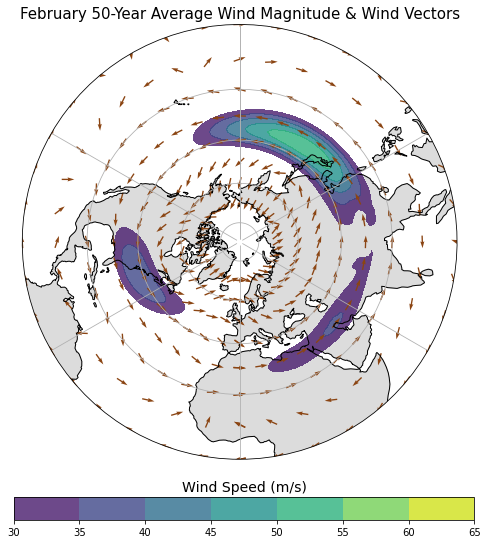

In [72]:
#feb

#calculate wind vectors
d_u=(feb_u/feb_mag)
d_v=(feb_v/feb_mag)
feb_u=d_u.where(d_u.lat<75).where(d_u.values<100).where(d_u.values>-100)#eliminate some wild outlier values
feb_v=d_v.where(d_v.lat<75).where(d_v.values<100).where(d_v.values>-100)
lon,lat=np.meshgrid(feb_mag.lon,feb_mag.lat)

space=8

#plot
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection=ccrs.NorthPolarStereo())
ax.coastlines(color='k')
cs=ax.contourf(feb_mag.lon,feb_mag.lat, feb_mag,transform=ccrs.PlateCarree(),cmap=plt.cm.viridis, alpha=0.8,levels=np.arange(30,70,5))
plt.quiver(lon[::space,::space],lat[::space,::space],feb_u.values[::space,::space],feb_v.values[::space,::space],transform=ccrs.PlateCarree(),pivot='middle', color='saddlebrown')
cax=fig.add_axes([0.12,0.02,0.8,0.04])
cbar=plt.colorbar(cs,cax=cax,orientation='horizontal')
cbar.ax.set_title('Wind Speed (m/s)', fontsize=14)
ax.add_feature(cfeature.LAND,color='gainsboro')
ax.set_title('February 50-Year Average Wind Magnitude & Wind Vectors', fontsize=15, loc='center')

#make plot circular
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.gridlines()
    

A few noticeable trends: December is by far the weakest winter month for the Polar Jet. The streak over the western Asia region is almost nonexistent, and the other two jet cores have their smallest area of all three months. However, this trend rapidly changes when January comes around. January is by far the strongest month for the Polar Jet. The jet cores over Japan and the U.S. reach their highest magnitude of all 3 months while also increasing in area. The jet streak over Western Asia has grown immensely and now stretches to Northern Africa and Southern Asia. By February the jet cores over Japan and the U.S. weaken slightly but maintain most of their size. The jet streak over Eastern Asia, however, actually strengthens a slight amount. In all 3 months, the wind vectors keep their same converging/diverging pattern as seen previously.

All are very intriguing pattens and I would be interested in performing this analysis of both the Subtropical and Polar Jets during the summer months to see their evolutions!